---

# Problem Statement: 
### Prepare a model that can summarize a conversation.

---

---

# Install required libraries

---

In [1]:
!pip3 list

Package                   Version
------------------------- ---------------
absl-py                   2.1.0
accelerate                0.22.0
aiohappyeyeballs          2.4.0
aiohttp                   3.10.5
aiosignal                 1.3.1
aniso8601                 9.0.1
annotated-types           0.7.0
ansi2html                 1.9.2
anyio                     4.4.0
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
async-lru                 2.0.4
async-timeout             4.0.3
attrs                     23.2.0
autovizwidget             0.21.0
awscli                    1.34.4
Babel                     2.14.0
beautifulsoup4            4.12.3
bleach                    6.1.0
blinker                   1.8.2
bokeh                     3.5.1
boto3                     1.35.4
botocore                  1.35.4
Brotli                    1.1.0
cached-property           1.5.2
captum                    0.6.0
certifi          

In [2]:
!pip3 install setuptools==68.0.0
!pip3 install nltk==3.8.1
!pip3 install datasets==2.14.5
!pip3 install numpy==1.24.4
!pip3 install torch==2.0.1
!pip3 install scipy==1.14.0
!pip3 install transformers==4.33.1
!pip3 install accelerate==0.22.0
!pip3 install evaluate==0.4.0
!pip3 install rouge-score==0.1.2
!pip3 install openpyxl
!pip3 install tensorboard
!pip3 install rich

In [3]:
!pip3 list

Package                   Version
------------------------- ---------------
absl-py                   2.1.0
accelerate                0.22.0
aiohappyeyeballs          2.4.0
aiohttp                   3.10.5
aiosignal                 1.3.1
aniso8601                 9.0.1
annotated-types           0.7.0
ansi2html                 1.9.2
anyio                     4.4.0
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
async-lru                 2.0.4
async-timeout             4.0.3
attrs                     23.2.0
autovizwidget             0.21.0
awscli                    1.34.4
Babel                     2.14.0
beautifulsoup4            4.12.3
bleach                    6.1.0
blinker                   1.8.2
bokeh                     3.5.1
boto3                     1.35.4
botocore                  1.35.4
Brotli                    1.1.0
cached-property           1.5.2
captum                    0.6.0
certifi          

---

# Import required libraries

---

In [4]:
import os
import numpy as np
import pandas as pd
import datetime
import pytz
import random

import matplotlib.pyplot as plt
%matplotlib inline

import transformers

import torch
import tqdm

import json
import datasets
from datasets import load_dataset
from datasets import concatenate_datasets
from datasets import DatasetDict

from IPython.display import Markdown

import nltk
import evaluate

from rich import print as rich_print
from pprint import pprint

from tqdm import tqdm

/home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/torch/cuda/__init__.py:546: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [5]:
os.environ["TOKENIZERS_PARALLELISM"] = "false"

In [6]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [7]:
# set random seed

var_seed = 42

torch.manual_seed(var_seed)

if torch.cuda.is_available():
    torch.cuda.manual_seed_all(var_seed)

In [8]:
# create a flag to show intermediate outputs or not

show_tokenizer_output = True

#### Declare important variables

In [9]:
project_name = "HF-LLM-FINETUNE"
show_tokenizer_output = True

model_source = "facebook"
model_name_ver = "bart-large"
model_checkpoint = model_source + "/" + model_name_ver
model_save_local_dir = project_name + "/" + model_source + "_" + model_name_ver + "_dialogsum_samsum"

In [10]:
print(model_checkpoint)

facebook/bart-large


In [11]:
print(model_save_local_dir)

HF-LLM-FINETUNE/facebook_bart-large_dialogsum_samsum


## Import an existing pre-trained language model from HuggingFace

---

## Facebook BART

We will explore Facebook BART model from HuggingFace
https://huggingface.co/facebook/bart-large

Bidirectional and Auto-Regressive Transformers (BART)

BART model pre-trained on English language. It was introduced in the paper BART: Denoising Sequence-to-Sequence Pre-training for Natural Language Generation, Translation, and Comprehension by Lewis et al.

---

In [12]:
from transformers import AutoTokenizer
from transformers import AutoModelForSeq2SeqLM

In [13]:
print(model_checkpoint)

facebook/bart-large


### Load the Tokenizer and Language Model (LLM)

In [14]:
%%time

# Load the tokenizer
init_tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

# Load the model
init_model = AutoModelForSeq2SeqLM.from_pretrained(model_checkpoint)

/home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


CPU times: user 7.18 s, sys: 1.35 s, total: 8.53 s
Wall time: 5.42 s


In [15]:
rich_print(init_tokenizer)

BartTokenizerFast(name_or_path='facebook/bart-large', vocab_size=50265, model_max_length=1024, is_fast=True, 
padding_side='right', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 
'unk_token': '<unk>', 'sep_token': '</s>', 'pad_token': '<pad>', 'cls_token': '<s>', 'mask_token': 
AddedToken("<mask>", rstrip=False, lstrip=True, single_word=False, normalized=False)}, 
clean_up_tokenization_spaces=True)

In [16]:
init_tokenizer.vocab

{'ĠMens': 20730,
 'ĠMJ': 33936,
 'Ġtwist': 10619,
 'Ġfortunate': 10583,
 'ĠFloyd': 13400,
 'Ġoffenses': 13888,
 'ĠMand': 10682,
 'ĠOrders': 32335,
 '009': 37892,
 'esome': 38297,
 'Ġvi': 12987,
 'ĠSymbol': 43883,
 'xf': 45678,
 'vector': 48219,
 'rix': 15072,
 'ĠDMV': 34743,
 'alian': 21999,
 'Ġcrane': 28472,
 'Ġdracon': 49653,
 'ĠCho': 11501,
 'Ġsiblings': 10384,
 'Ġnap': 16159,
 'umbai': 26772,
 'Ġoperative': 27133,
 'ries': 4458,
 'Ġelectrons': 36522,
 'Ġneur': 41213,
 'ef': 4550,
 'Ġ&': 359,
 'Ġlayout': 18472,
 'Ġstorms': 7749,
 'ĠCle': 8388,
 'aration': 36466,
 'ĠUPDATE': 24055,
 'Ġlock': 7014,
 'Ġrather': 1195,
 'Ġhottest': 14611,
 'Ġ1888': 44295,
 'Ġjavascript': 48882,
 'abc': 36822,
 'Ġdumps': 37017,
 'Ġrevealed': 1487,
 'Ġrolls': 12357,
 'Ġadds': 3639,
 'Ġprivately': 9638,
 'ĠBeg': 26347,
 'raph': 33518,
 'Ġunless': 3867,
 'Ġbeef': 6829,
 'amon': 22704,
 'ateg': 27586,
 'ule': 7590,
 'Ġhappiness': 11098,
 'comp': 11828,
 'ĠSort': 40649,
 'Ġvirginity': 42844,
 'ufficient': 4302

In [17]:
rich_print(init_model)

BartForConditionalGeneration(
  (model): BartModel(
    (shared): Embedding(50265, 1024, padding_idx=1)
    (encoder): BartEncoder(
      (embed_tokens): Embedding(50265, 1024, padding_idx=1)
      (embed_positions): BartLearnedPositionalEmbedding(1026, 1024)
      (layers): ModuleList(
        (0-11): 12 x BartEncoderLayer(
          (self_attn): BartAttention(
            (k_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (v_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (q_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (out_proj): Linear(in_features=1024, out_features=1024, bias=True)
          )
          (self_attn_layer_norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
          (activation_fn): GELUActivation()
          (fc1): Linear(in_features=1024, out_features=4096, bias=True)
          (fc2): Linear(in_features=4096, out_features=1024, bias=True)
          (final_layer_norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
        )
      )
      (layernorm_embedding): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
    )
    (decoder): BartDecoder(
      (embed_tokens): Embedding(50265, 1024, padding_idx=1)
      (embed_positions): BartLearnedPositionalEmbedding(1026, 1024)
      (layers): ModuleList(
        (0-11): 12 x BartDecoderLayer(
          (self_attn): BartAttention(
            (k_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (v_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (q_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (out_proj): Linear(in_features=1024, out_features=1024, bias=True)
          )
          (activation_fn): GELUActivation()
          (self_attn_layer_norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
          (encoder_attn): BartAttention(
            (k_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (v_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (q_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (out_proj): Linear(in_features=1024, out_features=1024, bias=True)
          )
          (encoder_attn_layer_norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
          (fc1): Linear(in_features=1024, out_features=4096, bias=True)
          (fc2): Linear(in_features=4096, out_features=1024, bias=True)
          (final_layer_norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
        )
      )
      (layernorm_embedding): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
    )
  )
  (lm_head): Linear(in_features=1024, out_features=50265, bias=False)
)

***
##### FYI

Gaussian Error Linear Units (GELUs): https://arxiv.org/abs/1606.08415
***

In [18]:
rich_print(f"Model Size: {np.round(init_model.num_parameters() / 1e6, 1)} Million parameters")

Model Size: 406.3 Million parameters

In [19]:
rich_print(f"Memory Requirement: {np.round(init_model.get_memory_footprint() / 1e9, 2)} GB")

Memory Requirement: 1.63 GB

## Explore some sample inputs

#### A sample instruction

In [20]:
sample_input = "Provide a step by step recipe to make pasta."

In [21]:
%%time

# tokenize/encode the sample input
sample_input_ids = init_tokenizer(sample_input, return_tensors="pt")

if show_tokenizer_output:
    pprint(sample_input_ids)

{'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]),
 'input_ids': tensor([[    0, 35746,  1949,    10,  1149,    30,  1149, 10324,     7,   146,
         18236,     4,     2]])}
CPU times: user 1.63 ms, sys: 528 μs, total: 2.16 ms
Wall time: 1.83 ms


In [22]:
%%time

# generate text
outputs = init_model.generate(sample_input_ids["input_ids"], max_new_tokens=100)

if show_tokenizer_output:
    pprint(outputs)

tensor([[    2,     0, 35746,  1949,    10,  1149,    30,  1149, 10324,     7,
           146, 18236,     4,     2]])
CPU times: user 18.6 s, sys: 0 ns, total: 18.6 s
Wall time: 781 ms


In [23]:
pprint(init_tokenizer.batch_decode(outputs, skip_special_tokens=True)[0])

'Provide a step by step recipe to make pasta.'


#### A sample conversation

In [24]:
### Sample: Generate Summary for sample conversation

sample_dialogue = """
Jon: What time is it, Tom?
Tom: Just a minute. It's ten to nine by my watch.
Jon: Is it? I had no idea it was so late. I must be off now.
Tom: What's the hurry?
Jon: I must catch the nine-thirty train.
Tom: You've plenty of time yet. The railway station is very close. It won't take more than twenty minutes to get there.
"""

sample_baseline_summary = "Jon is in a hurry to catch a train. Tom tells Jon there is plenty of time."

In [25]:
sample_input_ids = init_tokenizer(sample_dialogue, padding='max_length', truncation=True, return_tensors="pt")

if show_tokenizer_output:
    pprint(sample_input_ids)

{'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0]]),
 'input_ids': tensor([[    0, 50118, 27693,  ...,     1,     1,     1]])}


In [26]:
outputs = init_model.generate(sample_input_ids["input_ids"], max_new_tokens = 100)

if show_tokenizer_output:
    pprint(outputs)

tensor([[    2,     0, 15691,    35,   653,    86,    16,    24,     6,  1560,
           116, 15691,    35,  1801,    10,  2289,     4,    85,    18,  2724,
             7,  1117,    30,   127,  1183,     4, 27693,    35,  1534,    24,
           116,    38,    56,   117,  1114,    24,    21,    98,   628,     4,
         15691,    35,   370,   348,  2710,     9,    86,   648,     4,    20,
         10780,  1992,    16,   182,   593,     4,    85,   351,    75,   185,
            55,    87, 10328,   728,     7,   120,    89,     4,    38,   531,
            28,   160,   122,     4,    38,   581,    28,   124,    11,    41,
          1946,    50,    98,     4, 48173, 15113, 48003,  5543, 37127,  3726,
         18537, 48173, 15113, 36714,  4726, 12736, 48173, 15113, 37127,  3726,
             2]])


In [27]:
pprint(init_tokenizer.decode(outputs[0], skip_special_tokens=True))

("Tom: What time is it, Tom?Tom: Just a minute. It's ten to nine by my "
 "watch.Jon: Is it? I had no idea it was so late.Tom: You've plenty of time "
 "yet. The railway station is very close. It won't take more than twenty "
 "minutes to get there. I must be off now. I'll be back in an hour or "
 'so.通信書通美通�')


## Prompt Engineering: Prompt Templates
### Prompt 1: 'Summarize the following conversation'

In [28]:
start_prompt = "Summarize the following conversation.\n"
end_prompt = "\n\nSummary: "

sample_prompt = f'{start_prompt}{sample_dialogue}{end_prompt}'

print(sample_prompt)

Summarize the following conversation.

Jon: What time is it, Tom?
Tom: Just a minute. It's ten to nine by my watch.
Jon: Is it? I had no idea it was so late. I must be off now.
Tom: What's the hurry?
Jon: I must catch the nine-thirty train.
Tom: You've plenty of time yet. The railway station is very close. It won't take more than twenty minutes to get there.


Summary: 


In [29]:
sample_input_ids = init_tokenizer(sample_dialogue, padding='max_length', truncation=True, return_tensors="pt")

if show_tokenizer_output:
    pprint(sample_input_ids)

{'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0]]),
 'input_ids': tensor([[    0, 50118, 27693,  ...,     1,     1,     1]])}


In [30]:
outputs = init_model.generate(sample_input_ids["input_ids"], max_new_tokens = 100)

if show_tokenizer_output:
    pprint(outputs)

tensor([[    2,     0, 15691,    35,   653,    86,    16,    24,     6,  1560,
           116, 15691,    35,  1801,    10,  2289,     4,    85,    18,  2724,
             7,  1117,    30,   127,  1183,     4, 27693,    35,  1534,    24,
           116,    38,    56,   117,  1114,    24,    21,    98,   628,     4,
         15691,    35,   370,   348,  2710,     9,    86,   648,     4,    20,
         10780,  1992,    16,   182,   593,     4,    85,   351,    75,   185,
            55,    87, 10328,   728,     7,   120,    89,     4,    38,   531,
            28,   160,   122,     4,    38,   581,    28,   124,    11,    41,
          1946,    50,    98,     4, 48173, 15113, 48003,  5543, 37127,  3726,
         18537, 48173, 15113, 36714,  4726, 12736, 48173, 15113, 37127,  3726,
             2]])


In [31]:
generated_summary = init_tokenizer.decode(outputs[0], skip_special_tokens=True)

In [32]:
print("-" * 100)
print(f"Input Prompt:\n{sample_prompt}\n")
print("-" * 100)
print(f"Model Generated Summary:\n{generated_summary}\n")
print("-" * 100)
print(f"Baseline Summary:\n{sample_baseline_summary}\n")
print("-" * 100)

----------------------------------------------------------------------------------------------------
Input Prompt:
Summarize the following conversation.

Jon: What time is it, Tom?
Tom: Just a minute. It's ten to nine by my watch.
Jon: Is it? I had no idea it was so late. I must be off now.
Tom: What's the hurry?
Jon: I must catch the nine-thirty train.
Tom: You've plenty of time yet. The railway station is very close. It won't take more than twenty minutes to get there.


Summary: 

----------------------------------------------------------------------------------------------------
Model Generated Summary:
Tom: What time is it, Tom?Tom: Just a minute. It's ten to nine by my watch.Jon: Is it? I had no idea it was so late.Tom: You've plenty of time yet. The railway station is very close. It won't take more than twenty minutes to get there. I must be off now. I'll be back in an hour or so.通信書通美通�

-------------------------------------------------------------------------------------------

## Prompt Engineering: Prompt Templates
### Prompt 2 : 'What's going on prompt'

In [33]:
start_prompt = "Dialogue:\n"
end_prompt = "\nWhat was going on? "

sample_prompt = f'{start_prompt}{sample_dialogue}{end_prompt}'

print(sample_prompt)

Dialogue:

Jon: What time is it, Tom?
Tom: Just a minute. It's ten to nine by my watch.
Jon: Is it? I had no idea it was so late. I must be off now.
Tom: What's the hurry?
Jon: I must catch the nine-thirty train.
Tom: You've plenty of time yet. The railway station is very close. It won't take more than twenty minutes to get there.

What was going on? 


In [34]:
sample_input_ids = init_tokenizer(sample_prompt, return_tensors="pt")

if show_tokenizer_output:
    print(sample_input_ids)

{'input_ids': tensor([[    0, 48201,    35, 50118, 50118, 27693,    35,   653,    86,    16,
            24,     6,  1560,   116, 50118, 15691,    35,  1801,    10,  2289,
             4,    85,    18,  2724,     7,  1117,    30,   127,  1183,     4,
         50118, 27693,    35,  1534,    24,   116,    38,    56,   117,  1114,
            24,    21,    98,   628,     4,    38,   531,    28,   160,   122,
             4, 50118, 15691,    35,   653,    18,     5, 20607,   116, 50118,
         27693,    35,    38,   531,  2916,     5,  1117,    12,   212, 32430,
          2341,     4, 50118, 15691,    35,   370,   348,  2710,     9,    86,
           648,     4,    20, 10780,  1992,    16,   182,   593,     4,    85,
           351,    75,   185,    55,    87, 10328,   728,     7,   120,    89,
             4, 50118, 50118,  2264,    21,   164,    15,   116,  1437,     2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 

In [35]:
outputs = init_model.generate(sample_input_ids["input_ids"], max_new_tokens = 100)

if show_tokenizer_output:
    print(outputs)

tensor([[    2,     0, 48201,    35, 48201,    35, 27693,    35,   653,    86,
            16,    24,     6,  1560,   116, 50242, 15691,    35,  1801,    10,
          2289,     4,    20, 10780,  1992,    16,   182,   593,     4,    85,
           351,    75,   185,    55,    87, 10328,   728,     7,   120,    89,
             4,    38,   531,    28,   160,   122,     4,    85,    18,  2724,
             7,  1117,    30,   127,  1183,     4, 50249, 15691,    35,    85,
            18,    45,    14,   628,     6,    16,    24,   116,    85,    18,
           129,   799,    12,   212, 32430,     4, 50249, 27693,    35,  5534,
             6,  4420,     4,    85,    16,     4,    38,   437,  6661,     4,
         50249,   243,    18,    45,   350,   628,     6,  1560,     4, 50249,
             2]])


In [36]:
generated_summary = init_tokenizer.decode(outputs[0], skip_special_tokens=True)

In [37]:
print("-" * 100)
print(f"Input Prompt:\n{sample_prompt}\n")
print("-" * 100)
print(f"Model Generated Summary:\n{generated_summary}\n")
print("-" * 100)
print(f"Baseline Summary:\n{sample_baseline_summary}\n")
print("-" * 100)

----------------------------------------------------------------------------------------------------
Input Prompt:
Dialogue:

Jon: What time is it, Tom?
Tom: Just a minute. It's ten to nine by my watch.
Jon: Is it? I had no idea it was so late. I must be off now.
Tom: What's the hurry?
Jon: I must catch the nine-thirty train.
Tom: You've plenty of time yet. The railway station is very close. It won't take more than twenty minutes to get there.

What was going on? 

----------------------------------------------------------------------------------------------------
Model Generated Summary:
Dialogue:Dialogue:Jon: What time is it, Tom?ゼウスTom: Just a minute. The railway station is very close. It won't take more than twenty minutes to get there. I must be off now. It's ten to nine by my watch.                Tom: It's not that late, is it? It's only eight-thirty.                Jon: Oh, yes. It is. I'm sorry.                It's not too late, Tom.                

--------------------------

## Prompt Engineering: Prompt Templates
### Few-shot Inference 1

In [38]:
start_prompt = "Dialogue:\n"
end_prompt = "\nWhat was going on? "
stop_sequence = "\n\n\n"

In [39]:
another_sample_dialogue = """
Adam: What are you waiting for? Get on that bus quickly.
Max: But where do I get a ticket?
Adam: On the bus. The driver collects the fares. You'll have to take your luggage on board.
Max: Oh, I wish I didn't have so much to carry.
"""

another_sample_baseline_summary = "Adam urges Max to get on the bus."

In [40]:
few_shot_prompt = start_prompt + another_sample_dialogue + end_prompt + "\n" + another_sample_baseline_summary + "\n\n\n" + \
                    start_prompt + sample_dialogue + end_prompt


print(few_shot_prompt)

Dialogue:

Adam: What are you waiting for? Get on that bus quickly.
Max: But where do I get a ticket?
Adam: On the bus. The driver collects the fares. You'll have to take your luggage on board.
Max: Oh, I wish I didn't have so much to carry.

What was going on? 
Adam urges Max to get on the bus.


Dialogue:

Jon: What time is it, Tom?
Tom: Just a minute. It's ten to nine by my watch.
Jon: Is it? I had no idea it was so late. I must be off now.
Tom: What's the hurry?
Jon: I must catch the nine-thirty train.
Tom: You've plenty of time yet. The railway station is very close. It won't take more than twenty minutes to get there.

What was going on? 


In [41]:
sample_input_ids = init_tokenizer(few_shot_prompt, return_tensors="pt")

if show_tokenizer_output:
    print(sample_input_ids)

{'input_ids': tensor([[    0, 48201,    35, 50118, 50118, 24671,    35,   653,    32,    47,
          2445,    13,   116,  2315,    15,    14,  2353,  1335,     4, 50118,
         19854,    35,   125,   147,   109,    38,   120,    10,  3682,   116,
         50118, 24671,    35,   374,     5,  2353,     4,    20,  1393, 22671,
             5, 18688,     4,   370,   581,    33,     7,   185,   110, 19607,
            15,   792,     4, 50118, 19854,    35,  5534,     6,    38,  2813,
            38,   399,    75,    33,    98,   203,     7,  2324,     4, 50118,
         50118,  2264,    21,   164,    15,   116,  1437, 50118, 24671, 19288,
          4471,     7,   120,    15,     5,  2353,     4, 50140, 50118, 48201,
            35, 50118, 50118, 27693,    35,   653,    86,    16,    24,     6,
          1560,   116, 50118, 15691,    35,  1801,    10,  2289,     4,    85,
            18,  2724,     7,  1117,    30,   127,  1183,     4, 50118, 27693,
            35,  1534,    24,   116,  

In [42]:
outputs = init_model.generate(sample_input_ids["input_ids"], max_new_tokens = 100)

if show_tokenizer_output:
    print(outputs)

tensor([[    2,     0,     0,     0, 48201,    35, 48201,    35, 13635, 48201,
            35,  5514,  5514,  5514,    12,  5514,  5514,   578,  5514,  5514,
          2383,  5514,  5514,    93,  5514,  5514, 13635,  5514,   578,   578,
          5514,  2383,   578,  5514,   578,  2383,  5514,   578,    12,  5514,
           578,    93,  5514,   578, 13635,   578,  5514,    12,   578,   578,
          2383,   578,   578,   578,    12,   578,  2383,  2383,   578,    12,
          2383,   578,  2383,    12,   578,    12,    12,  5514,  2383,  2383,
          5514,  2383,    12,  2383,  2383,  2383,    12,  5514,    12,  2383,
            12, 13635,   578,  2383, 13635,   578,   578, 13635,  5514,  5514,
         28629,   578,   578,    93,  2383,   578,    93,   578,  2383,    93,
             2]])


In [43]:
generated_summary = init_tokenizer.decode(outputs[0], skip_special_tokens=True)

In [44]:
print("-" * 100)
print(f"Input Prompt:\n{few_shot_prompt}\n")
print("-" * 100)
print(f"Model Generated Summary:\n{generated_summary}\n")
print("-" * 100)
print(f"Baseline Summary:\n{sample_baseline_summary}\n")
print("-" * 100)

----------------------------------------------------------------------------------------------------
Input Prompt:
Dialogue:

Adam: What are you waiting for? Get on that bus quickly.
Max: But where do I get a ticket?
Adam: On the bus. The driver collects the fares. You'll have to take your luggage on board.
Max: Oh, I wish I didn't have so much to carry.

What was going on? 
Adam urges Max to get on the bus.


Dialogue:

Jon: What time is it, Tom?
Tom: Just a minute. It's ten to nine by my watch.
Jon: Is it? I had no idea it was so late. I must be off now.
Tom: What's the hurry?
Jon: I must catch the nine-thirty train.
Tom: You've plenty of time yet. The railway station is very close. It won't take more than twenty minutes to get there.

What was going on? 

----------------------------------------------------------------------------------------------------
Model Generated Summary:
Dialogue:Dialogue:​Dialogue:­­­-­­—­­–­­ —­­​­——­–—­—–­—-­— —­—​—­-——–———-—––—-–—–-—--­––­–-–––-­-–-​—–​—

## Prompt Engineering: Prompt Templates
### Few-shot Inference 2

In [45]:
start_prompt = "Here is a conversation between two friends:\n"
end_prompt = "\nProvide a summary of the conversation: "
stop_sequence = "\n\n\n"

In [46]:
few_shot_prompt = start_prompt + another_sample_dialogue + end_prompt + another_sample_baseline_summary + "\n\n\n" + \
                    start_prompt + sample_dialogue + end_prompt


print(few_shot_prompt)

Here is a conversation between two friends:

Adam: What are you waiting for? Get on that bus quickly.
Max: But where do I get a ticket?
Adam: On the bus. The driver collects the fares. You'll have to take your luggage on board.
Max: Oh, I wish I didn't have so much to carry.

Provide a summary of the conversation: Adam urges Max to get on the bus.


Here is a conversation between two friends:

Jon: What time is it, Tom?
Tom: Just a minute. It's ten to nine by my watch.
Jon: Is it? I had no idea it was so late. I must be off now.
Tom: What's the hurry?
Jon: I must catch the nine-thirty train.
Tom: You've plenty of time yet. The railway station is very close. It won't take more than twenty minutes to get there.

Provide a summary of the conversation: 


In [47]:
sample_input_ids = init_tokenizer(few_shot_prompt, return_tensors="pt")

if show_tokenizer_output:
    print(sample_input_ids)

{'input_ids': tensor([[    0, 11773,    16,    10,  1607,   227,    80,   964,    35, 50118,
         50118, 24671,    35,   653,    32,    47,  2445,    13,   116,  2315,
            15,    14,  2353,  1335,     4, 50118, 19854,    35,   125,   147,
           109,    38,   120,    10,  3682,   116, 50118, 24671,    35,   374,
             5,  2353,     4,    20,  1393, 22671,     5, 18688,     4,   370,
           581,    33,     7,   185,   110, 19607,    15,   792,     4, 50118,
         19854,    35,  5534,     6,    38,  2813,    38,   399,    75,    33,
            98,   203,     7,  2324,     4, 50118, 50118, 35746,  1949,    10,
          4819,     9,     5,  1607,    35,  3086, 19288,  4471,     7,   120,
            15,     5,  2353,     4, 50140, 50118, 11773,    16,    10,  1607,
           227,    80,   964,    35, 50118, 50118, 27693,    35,   653,    86,
            16,    24,     6,  1560,   116, 50118, 15691,    35,  1801,    10,
          2289,     4,    85,    18,  

In [48]:
outputs = init_model.generate(sample_input_ids["input_ids"], max_new_tokens = 100)

if show_tokenizer_output:
    print(outputs)

tensor([[    2,     0, 11773,    16,    10,  1607,   227,    80,   964,    35,
         50024, 50028, 50019, 48771, 50024, 50028, 48771, 50024, 50019, 48771,
         50019, 48771, 48771, 50024, 50024, 50028,  5214, 50024, 50028,  5457,
         50024, 50024, 50019,  5214, 50024, 50024, 50024,  5214, 50024, 48771,
         50024, 48771, 50028, 48771, 48771, 48771, 50028,  5214, 50019, 48771,
          5214, 50024,  5214, 48771, 50024,  5214, 50019,  5214, 48771, 48771,
          1215, 48771, 48771,  5214, 48771, 50019,  5214,  5214, 48771,  5214,
          5214,  1215, 48771,  5214,    12, 48771, 48771, 43292, 48771, 48771,
         48613, 48771, 48771, 49310, 48771, 48771, 49915, 48771, 48771,   328,
         48771, 48771,   207, 48771, 48771, 15483, 48771, 48771, 49085, 48771,
             2]])


In [49]:
generated_summary = init_tokenizer.decode(outputs[0], skip_special_tokens=True)

In [50]:
print("-" * 100)
print(f"Input Prompt:\n{few_shot_prompt}\n")
print("-" * 100)
print(f"Model Generated Summary:\n{generated_summary}\n")
print("-" * 100)
print(f"Baseline Summary:\n{sample_baseline_summary}\n")
print("-" * 100)

----------------------------------------------------------------------------------------------------
Input Prompt:
Here is a conversation between two friends:

Adam: What are you waiting for? Get on that bus quickly.
Max: But where do I get a ticket?
Adam: On the bus. The driver collects the fares. You'll have to take your luggage on board.
Max: Oh, I wish I didn't have so much to carry.

Provide a summary of the conversation: Adam urges Max to get on the bus.


Here is a conversation between two friends:

Jon: What time is it, Tom?
Tom: Just a minute. It's ten to nine by my watch.
Jon: Is it? I had no idea it was so late. I must be off now.
Tom: What's the hurry?
Jon: I must catch the nine-thirty train.
Tom: You've plenty of time yet. The railway station is very close. It won't take more than twenty minutes to get there.

Provide a summary of the conversation: 

----------------------------------------------------------------------------------------------------
Model Generated Summary

---

# Datasets

### Conversation dataset used:
- DialogSum
- SAMSum

To load the datasets, use the load_dataset() method from the HuggingFace Datasets library.

After loading these datasets, we will clean and merge them, to create a custom training dataset for the model fine-tuning process.

---

## Load the 'DialogSum' dataset

https://github.com/cylnlp/dialogsum (DialogSum: A Real-life Scenario Dialogue Summarization Dataset)

In [51]:
%%time

hf_dataset_1_name = "knkarthick/dialogsum"
hf_dataset_1_dict = load_dataset(hf_dataset_1_name)

CPU times: user 80.7 ms, sys: 3.86 ms, total: 84.5 ms
Wall time: 1.52 s


In [52]:
hf_dataset_1_dict.shape

{'train': (12460, 4), 'validation': (500, 4), 'test': (1500, 4)}

In [53]:
pprint(hf_dataset_1_dict["train"][0])

{'dialogue': "#Person1#: Hi, Mr. Smith. I'm Doctor Hawkins. Why are you here "
             'today?\n'
             '#Person2#: I found it would be a good idea to get a check-up.\n'
             "#Person1#: Yes, well, you haven't had one for 5 years. You "
             'should have one every year.\n'
             '#Person2#: I know. I figure as long as there is nothing wrong, '
             'why go see the doctor?\n'
             '#Person1#: Well, the best way to avoid serious illnesses is to '
             'find out about them early. So try to come at least once a year '
             'for your own good.\n'
             '#Person2#: Ok.\n'
             '#Person1#: Let me see here. Your eyes and ears look fine. Take a '
             'deep breath, please. Do you smoke, Mr. Smith?\n'
             '#Person2#: Yes.\n'
             '#Person1#: Smoking is the leading cause of lung cancer and heart '
             'disease, you know. You really should quit.\n'
             "#Person2#: I've tried

#### Load sample conversation and run through the model

In [54]:
example_index = 40

sample_dialogue = hf_dataset_1_dict["test"][example_index]["dialogue"]
print("-" * 100)
print("Sample Dialog:")
print(sample_dialogue)

print()

sample_baseline_summary = hf_dataset_1_dict["test"][example_index]["summary"]
print("-" * 100)
print("Baseline Summary:")
print(sample_baseline_summary)

----------------------------------------------------------------------------------------------------
Sample Dialog:
#Person1#: What time is it, Tom?
#Person2#: Just a minute. It's ten to nine by my watch.
#Person1#: Is it? I had no idea it was so late. I must be off now.
#Person2#: What's the hurry?
#Person1#: I must catch the nine-thirty train.
#Person2#: You've plenty of time yet. The railway station is very close. It won't take more than twenty minutes to get there.

----------------------------------------------------------------------------------------------------
Baseline Summary:
#Person1# is in a hurry to catch a train. Tom tells #Person1# there is plenty of time.


In [55]:
sample_input_ids = init_tokenizer(sample_dialogue, return_tensors="pt")

if show_tokenizer_output:
    pprint(sample_input_ids)

{'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]),
 'input_ids': tensor([[    0, 10431, 41761,   134, 10431,    35,   653,    86,    16,    24,
             6,  1560,   116, 50118, 10431, 41761,   176, 10431,    35,  1801,
            10,  2289,     4,    85,    18,  2724,     7,  1117,    30,   127,
          1183,     4, 50118, 10431, 41761,   134, 10431,    35,  1534,    24,
           116,    38,    56,   117,  1114,    24,    21,    98,   628,     4,
            38,   531,    28,   160,   122,     4, 50118, 10431, 41761,   176,
         10431,    35,   653,    18,     5, 20607,   116, 50118, 10431, 41761,
           134, 10

In [56]:
outputs = init_model.generate(sample_input_ids["input_ids"], max_new_tokens = 100)

if show_tokenizer_output:
    print(outputs)

tensor([[    2,     0, 10431, 41761,   134, 10431,    35,   653,    86,    16,
            24,     6,  1560,   116, 10431, 41761,   176, 10431,    35,  1801,
            10,  2289,     4,    85,    18,  2724,     7,  1117,    30,   127,
          1183,     4,    38,   531,    28,   160,   122,     4,    20, 10780,
          1992,    16,   182,   593,     4,    85,   351,    75,   185,    55,
            87, 10328,   728,     7,   120,    89,     4,    38,   581,   972,
            47,    89,    23,  1117,    12,   212, 32430,     6,   114,    47,
           218,    75,  1508,     4, 10431, 41761,   288, 10431,    35,    85,
            18,   350,   628,     6,  1560,     6,    38,   437,  6661,    59,
            14,     4,    38,    56,   117,  1114,    24,    21,    98,   628,
             2]])


In [57]:
print(init_tokenizer.decode(outputs[0], skip_special_tokens=True))

#Person1#: What time is it, Tom?#Person2#: Just a minute. It's ten to nine by my watch. I must be off now. The railway station is very close. It won't take more than twenty minutes to get there. I'll meet you there at nine-thirty, if you don't mind.#Person0#: It's too late, Tom, I'm sorry about that. I had no idea it was so late


## Load the 'SAMSum' dataset

https://github.com/tensorflow/datasets/blob/master/docs/catalog/samsum.md (SAMSum Corpus contains over 16k chat dialogues with manually annotated summaries.)

In [58]:
%%time

hf_dataset_2_name = "knkarthick/samsum"
hf_dataset_2_dict = load_dataset(hf_dataset_2_name)

CPU times: user 166 ms, sys: 4.6 ms, total: 171 ms
Wall time: 1.34 s


In [59]:
hf_dataset_2_dict.shape

{'train': (14732, 3), 'validation': (818, 3), 'test': (819, 3)}

In [60]:
pprint(hf_dataset_2_dict["train"][0])

{'dialogue': 'Amanda: I baked  cookies. Do you want some?\n'
             'Jerry: Sure!\n'
             "Amanda: I'll bring you tomorrow :-)",
 'id': '13818513',
 'summary': 'Amanda baked cookies and will bring Jerry some tomorrow.'}


#### Load sample conversation and run through the model

In [61]:
example_index = 40

sample_dialogue = hf_dataset_2_dict["test"][example_index]["dialogue"]
print("-" * 100)
print("Sample Dialog:")
print(sample_dialogue)

print()

sample_baseline_summary = hf_dataset_2_dict["test"][example_index]["summary"]
print("-" * 100)
print("Baseline Summary:")
print(sample_baseline_summary)

----------------------------------------------------------------------------------------------------
Sample Dialog:
Sebastian: It's been already a year since we moved here.
Sebastian: This is totally the best time of my life.
Kevin: Really? 
Sebastian: Yeah! Totally maaan.
Sebastian: During this 1 year I learned more than ever. 
Sebastian: I learned how to be resourceful, I'm learning responsibility, and I literally have the power to make my dreams come true.
Kevin: It's great to hear that.
Kevin: It's great that you are satisfied with your decisions.
Kevin: And above all it's great to see that you have someone you love by your side :)
Sebastian: Exactly!
Sebastian: That's another part of my life that is going great.
Kevin: I wish I had such a person by my side.
Sebastian: Don't worry about it.
Sebastian: I have a feeling this day will come shortly.
Kevin: Haha. I don' think so, but thanks.
Sebastian: This one year proved to me that when you want something really badly, you can achieve

In [62]:
sample_input_ids = init_tokenizer(sample_dialogue, return_tensors="pt")

if show_tokenizer_output:
    pprint(sample_input_ids)

{'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         

In [63]:
outputs = init_model.generate(sample_input_ids["input_ids"], max_new_tokens = 100)

if show_tokenizer_output:
    print(outputs)

tensor([[    2,     0,     0,   104,  3209,  1988,   811,    35,    85,    18,
            57,   416,    10,    76,   187,    52,  1410,   259,     4,    38,
           218,   108,   206,    98,     6,    53,  2446,     4,    38,   437,
            98,  1372,     7,    28,   259,     8,    38,   437,   269,  1372,
            19,   127,   301,   259,     4, 50095, 10172,  8906, 21910,    35,
            38,   437,  1372,    13,    47,     6,   350,     4,    38,  1034,
            47,    33,    10,   372,    86,   259,     4,   104, 19928,   225,
         21910,    35,  3837,    47,    98,   203,     4,    38,   269,  5478,
            24,     4,    38,   216,    24,    18,    57,    10,   251,    86,
             6,    53,    38,   437,  7785,    47,   214,  1372,   259,     4,
             2]])


In [64]:
pprint(init_tokenizer.decode(outputs[0], skip_special_tokens=True))

("Sebastian: It's been already a year since we moved here. I don' think so, "
 "but thanks. I'm so happy to be here and I'm really happy with my life "
 "here.�Kevin: I'm happy for you, too. I hope you have a great time "
 "here.SeadenKevin: Thank you so much. I really appreciate it. I know it's "
 "been a long time, but I'm glad you're happy here.")


---

# Preprocessing Step

---

### Merge different sets in 'DialogSum' 

There are 3 sets, namely, 'train', 'validation', and 'test' in the 'DialogSum' dataset. We will merge them for model fine-tuning.

You can view the data here: https://huggingface.co/datasets/knkarthick/dialogsum

In [65]:
from datasets import concatenate_datasets
from datasets import DatasetDict

rich_print(hf_dataset_1_dict["train"].features)
rich_print(hf_dataset_1_dict["test"].features)
rich_print(hf_dataset_1_dict["validation"].features)

{
    'id': Value(dtype='string', id=None),
    'dialogue': Value(dtype='string', id=None),
    'summary': Value(dtype='string', id=None),
    'topic': Value(dtype='string', id=None)
}

{
    'id': Value(dtype='string', id=None),
    'dialogue': Value(dtype='string', id=None),
    'summary': Value(dtype='string', id=None),
    'topic': Value(dtype='string', id=None)
}

{
    'id': Value(dtype='string', id=None),
    'dialogue': Value(dtype='string', id=None),
    'summary': Value(dtype='string', id=None),
    'topic': Value(dtype='string', id=None)
}

In [66]:
%%time

# Merge / Concatenate datasets
hf_dataset_1_dict_merged = concatenate_datasets([hf_dataset_1_dict["train"]
                                                 , hf_dataset_1_dict["test"]
                                                 , hf_dataset_1_dict["validation"]], axis=0)

rich_print(hf_dataset_1_dict_merged)

/home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/datasets/table.py:1421: FutureWarning: promote has been superseded by promote_options='default'.
  table = cls._concat_blocks(blocks, axis=0)


Dataset({
    features: ['id', 'dialogue', 'summary', 'topic'],
    num_rows: 14460
})

CPU times: user 5.54 ms, sys: 0 ns, total: 5.54 ms
Wall time: 5.05 ms


In [67]:
# shuffle

hf_dataset_1_dict_merged = hf_dataset_1_dict_merged.shuffle(seed=var_seed)
rich_print(hf_dataset_1_dict_merged)

Dataset({
    features: ['id', 'dialogue', 'summary', 'topic'],
    num_rows: 14460
})

In [68]:
# check the length of input and output texts
all_input_length_1 = [len(diag) for diag in hf_dataset_1_dict_merged["dialogue"]]
all_output_length_1 = [len(diag) for diag in hf_dataset_1_dict_merged["summary"]]

df_all_length_1 = pd.DataFrame([all_input_length_1, all_output_length_1]).T
df_all_length_1.columns = ["length_input", "length_output"]
rich_print(df_all_length_1.head(10))

length_input  length_output
0           246             49
1           607            105
2          1307            281
3           672            114
4          1429            292
5           554            142
6           864            144
7           238             50
8           610            130
9           461            124

In [69]:
# maximum length of the input conversation and the output summary 
max(df_all_length_1["length_input"]), max(df_all_length_1["length_output"])

(5178, 1039)

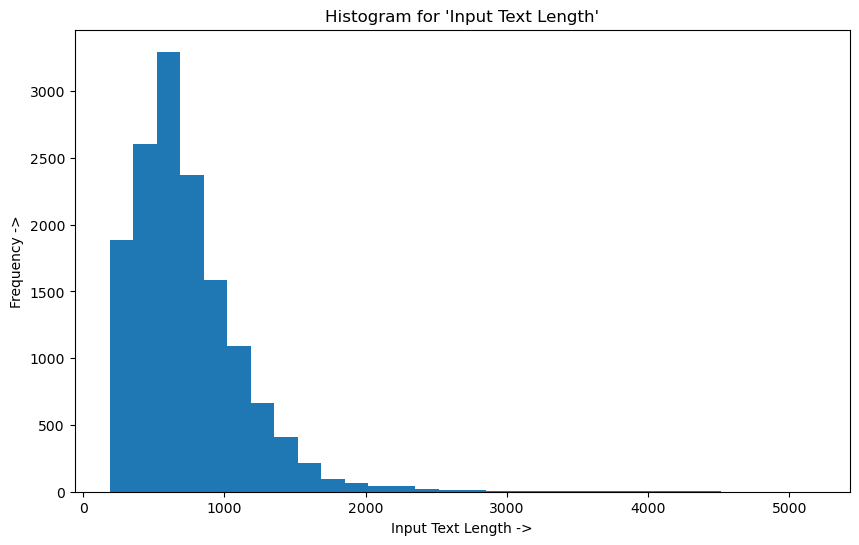

In [70]:
plt.figure(figsize=(10, 6))
plt.hist(df_all_length_1["length_input"], bins=30)
plt.xlabel("Input Text Length ->")
plt.ylabel("Frequency ->")
plt.title("Histogram for 'Input Text Length'")
plt.show()

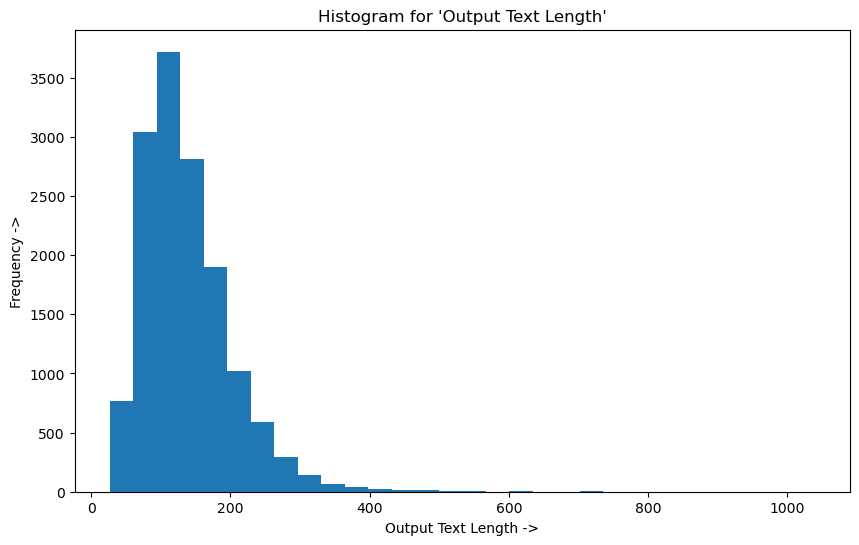

In [71]:
plt.figure(figsize=(10, 6))
plt.hist(df_all_length_1["length_output"], bins=30)
plt.xlabel("Output Text Length ->")
plt.ylabel("Frequency ->")
plt.title("Histogram for 'Output Text Length'")
plt.show()

In [72]:
print(np.percentile(df_all_length_1["length_input"], 90))
print(np.percentile(df_all_length_1["length_output"], 99))

1228.0
340.8199999999997


In [73]:
# set the maximum length for the Input Conversation (training data) and the Output Summary (target)
max_input = 1024
max_target = 256

In [74]:
# train/validation/test split ratio
processing_train_split = 0.92
processing_valid_split = 0.04
processing_test_split = 0.04

In [75]:
hf1_t1 = hf_dataset_1_dict_merged.train_test_split(1 - processing_train_split, seed=var_seed)

hf1_t2 = hf1_t1['test'].train_test_split(
    processing_test_split / (processing_valid_split + processing_test_split), seed=var_seed)

hf1_t3 = DatasetDict(
    {
        "train": hf1_t1["train"],
        "validation": hf1_t2["train"],
        "test": hf1_t2["test"]
    }
)

In [76]:
rich_print(hf1_t3)

DatasetDict({
    train: Dataset({
        features: ['id', 'dialogue', 'summary', 'topic'],
        num_rows: 13303
    })
    validation: Dataset({
        features: ['id', 'dialogue', 'summary', 'topic'],
        num_rows: 578
    })
    test: Dataset({
        features: ['id', 'dialogue', 'summary', 'topic'],
        num_rows: 579
    })
})

#### Load sample conversation before tokenization

In [77]:
example_index = 40

sample_dialogue = hf1_t3["test"][example_index]["dialogue"]
print("-" * 100)
print("Sample Dialog:")
print(sample_dialogue)

print()

sample_baseline_summary = hf1_t3["test"][example_index]["summary"]
print("-" * 100)
print("Baseline Summary:")
print(sample_baseline_summary)

----------------------------------------------------------------------------------------------------
Sample Dialog:
#Person1#: I've never met anyone like Clyde before.
#Person2#: He's such a buppie-a black yuppie. Black people come in all shapes and sizes. Just check out the party.
#Person1#: Wow! There are so many different people here. I expected mostly athletes and rappers.
#Person2#: You'll find some of those here, too. But not if you don't shake it up! There's an African saying, ' If you can talk, you can sing! If you can walk, you can dance! '
#Person1#: Then I'll just shut up and sit down!

----------------------------------------------------------------------------------------------------
Baseline Summary:
#Person1# and #Person2# talk about black people at the party who are born to be good at singing and dancing.


In [78]:
%%time

# tokenize the data batches
def hf_tokenize_dialogsum_data(sample_batch, padding="max_length"):
    # generate prompts for training
    start_prompt = "Summarize the following conversation.\n\n"
    end_prompt = "\n\nSummary: "
    
    # model inputs
    model_inputs = [start_prompt + sample + end_prompt for sample in sample_batch["dialogue"]]
    
    # Input Conversation
    model_inputs = init_tokenizer(
        model_inputs, 
        max_length=max_input, 
        padding=padding, 
        truncation=True)
        
    # Output Summary
    # Tokenize labels with the `text_target` argument
    labels = init_tokenizer(
        text_target=sample_batch["summary"], 
        padding="max_length", 
        max_length=max_target, 
        truncation=True)
    
    # replace all tokenizer.pad_token_id in the labels by -100
    if padding == "max_length":
        labels["input_ids"] = [
            [(l if l != init_tokenizer.pad_token_id else -100) for l in temp_label] 
            for temp_label in labels["input_ids"]
        ]
    
    model_inputs["labels"] = labels["input_ids"]
    
    return model_inputs
    
    
tokenized_hf1_t3 = hf1_t3.map(hf_tokenize_dialogsum_data, batched=True)
tokenized_hf1_t3 = tokenized_hf1_t3.remove_columns(['id', 'topic', 'dialogue', 'summary'])

Map:   0%|          | 0/579 [00:00<?, ? examples/s]

CPU times: user 747 ms, sys: 12 ms, total: 759 ms
Wall time: 757 ms


In [79]:
rich_print(tokenized_hf1_t3)

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 13303
    })
    validation: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 578
    })
    test: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 579
    })
})

#### Load sample conversation after tokenization

In [80]:
example_index = 40

sample_dialogue = tokenized_hf1_t3["test"][example_index]["input_ids"]
print("-" * 100)
print("Sample Dialog Length:")
print(len(sample_dialogue))

print()

sample_baseline_summary = tokenized_hf1_t3["test"][example_index]["labels"]
print("-" * 100)
print("Baseline Summary Length:")
print(len(sample_baseline_summary))

----------------------------------------------------------------------------------------------------
Sample Dialog Length:
1024

----------------------------------------------------------------------------------------------------
Baseline Summary Length:
256


In [81]:
train_sample_percentage = 1.00

In [82]:
%%time

# sample the dataset for training
skip_inds = int(1 / train_sample_percentage)
sample_tokenized_hf1_dataset = tokenized_hf1_t3.filter(
    lambda example, indice: indice % skip_inds == 0, with_indices=True)

Filter:   0%|          | 0/579 [00:00<?, ? examples/s]

CPU times: user 547 ms, sys: 8 ms, total: 555 ms
Wall time: 553 ms


In [83]:
rich_print(sample_tokenized_hf1_dataset)

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 13303
    })
    validation: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 578
    })
    test: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 579
    })
})

### Merge different sets in 'SAMSum'. 

There are 3 sets, namely, 'train', 'validation', and 'test' in the 'SAMSum' dataset. We will merge them for model fine-tuning.

You can view the data here: https://huggingface.co/datasets/knkarthick/samsum

In [84]:
from datasets import concatenate_datasets
from datasets import DatasetDict

rich_print(hf_dataset_2_dict["train"].features)
rich_print(hf_dataset_2_dict["test"].features)
rich_print(hf_dataset_2_dict["validation"].features)

{
    'id': Value(dtype='string', id=None),
    'dialogue': Value(dtype='string', id=None),
    'summary': Value(dtype='string', id=None)
}

{
    'id': Value(dtype='string', id=None),
    'dialogue': Value(dtype='string', id=None),
    'summary': Value(dtype='string', id=None)
}

{
    'id': Value(dtype='string', id=None),
    'dialogue': Value(dtype='string', id=None),
    'summary': Value(dtype='string', id=None)
}

In [85]:
%%time

# Merge / Concatenate datasets
hf_dataset_2_dict_merged = concatenate_datasets([hf_dataset_2_dict["train"]
                                                 , hf_dataset_2_dict["test"]
                                                 , hf_dataset_2_dict["validation"]], axis=0)

rich_print(hf_dataset_2_dict_merged)

/home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/datasets/table.py:1421: FutureWarning: promote has been superseded by promote_options='default'.
  table = cls._concat_blocks(blocks, axis=0)


Dataset({
    features: ['id', 'dialogue', 'summary'],
    num_rows: 16369
})

CPU times: user 4.67 ms, sys: 9 μs, total: 4.68 ms
Wall time: 4.23 ms


In [86]:
# shuffle
hf_dataset_2_dict_merged = hf_dataset_2_dict_merged.shuffle(seed=var_seed)

rich_print(hf_dataset_2_dict_merged)

Dataset({
    features: ['id', 'dialogue', 'summary'],
    num_rows: 16369
})

In [87]:
# check the length of input and output texts
all_input_length_2 = []
all_output_length_2 = []

# there is one sample where either the dialogue or the summary is missing
for sample in hf_dataset_2_dict_merged:
    if sample["dialogue"] is None or sample["summary"] is None:
        print(sample["id"])
    
    if sample["dialogue"] is not None and sample["summary"] is not None:
        all_input_length_2.append(len(sample["dialogue"]))
        all_output_length_2.append(len(sample["summary"]))
        
df_all_length_2 = pd.DataFrame([all_input_length_2, all_output_length_2]).T
df_all_length_2.columns = ["length_input", "length_output"]
rich_print(df_all_length_2.head(10))

13828807


length_input  length_output
0           120             66
1           194             99
2           675            225
3           510            136
4           408             67
5           154             43
6           740            140
7           236             46
8          1470            133
9          1219            177

In [88]:
# maximum length of the input conversation and the output summary
max(df_all_length_2["length_input"]), max(df_all_length_2["length_output"])

(5474, 300)

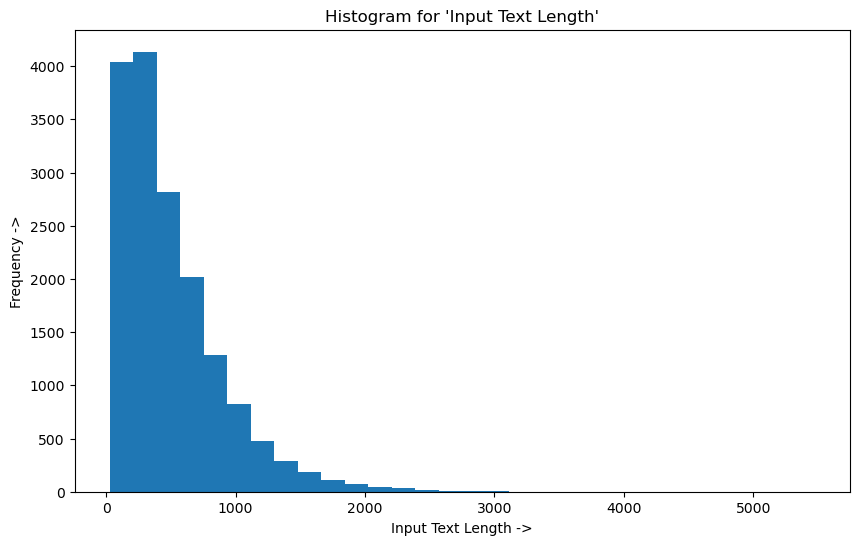

In [89]:
plt.figure(figsize=(10, 6))
plt.hist(df_all_length_2["length_input"], bins=30)
plt.xlabel("Input Text Length ->")
plt.ylabel("Frequency ->")
plt.title("Histogram for 'Input Text Length'")
plt.show()

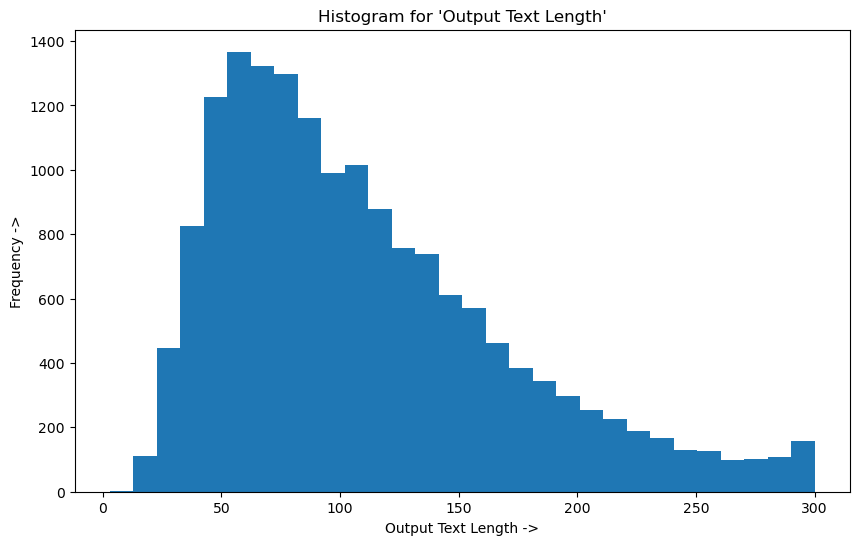

In [90]:
plt.figure(figsize=(10, 6))
plt.hist(df_all_length_2["length_output"], bins=30)
plt.xlabel("Output Text Length ->")
plt.ylabel("Frequency ->")
plt.title("Histogram for 'Output Text Length'")
plt.show()

In [91]:
print(np.percentile(df_all_length_2["length_input"], 90))
print(np.percentile(df_all_length_2["length_output"], 99))

1017.0
290.0


In [92]:
# set the maximum length for the Input Conversation (training data) and the Output Summary (target)
max_input = 1024
max_target = 256

In [93]:
# train/validation/test split ratio
processing_train_split = 0.92
processing_valid_split = 0.04
processing_test_split = 0.04

In [94]:
%%time

hf_dataset_2_df_merged = pd.DataFrame(hf_dataset_2_dict_merged)
hf_dataset_2_df_merged.fillna("", inplace=True)

CPU times: user 1.32 s, sys: 8 ms, total: 1.33 s
Wall time: 1.33 s


In [95]:
hf_dataset_2_df_merged.shape

(16369, 3)

In [96]:
hf_dataset_2_df_merged.head()

,id,dialogue,summary
0,13864627,Mary: Are you going by car or train?\nTom: Ell...,"Ella rented a car, this makes things much fast..."
1,13730660,"Linden: Hi Litia, this is my new email linden@...",Linden has a new e-mail address linden@gmail.b...
2,13828264,Julie: How was Rome??\nJulie: I saw some pictu...,Martha had a hen party in Rome. She was there ...
3,13682264,Damian: Have a situation and need your help ma...,Damian's got a flat tyre on the corner of Coll...
4,13716803,Bob: Have you been to this new exhibition?\nDa...,"Bob, Daryl and Greg are going to the National ..."


In [97]:
# invalid sample. needs to be removed before tokenization
hf_dataset_2_df_merged[(hf_dataset_2_df_merged["dialogue"] == "") | (hf_dataset_2_df_merged["summary"] == "")]

,id,dialogue,summary
8278,13828807,,problem with visualization of the content


In [98]:
hf_dataset_2_df_merged = hf_dataset_2_df_merged[hf_dataset_2_df_merged["dialogue"] != ""]
# hf_dataset_2_df_merged.reset_index(drop=True, inplace=True)
hf_dataset_2_df_merged.index = hf_dataset_2_df_merged.id
hf_dataset_2_df_merged.drop(columns=["id"], inplace=True)

In [99]:
hf_dataset_2_df_merged.head()

,dialogue,summary
id,,
13864627,Mary: Are you going by car or train?\nTom: Ell...,"Ella rented a car, this makes things much fast..."
13730660,"Linden: Hi Litia, this is my new email linden@...",Linden has a new e-mail address linden@gmail.b...
13828264,Julie: How was Rome??\nJulie: I saw some pictu...,Martha had a hen party in Rome. She was there ...
13682264,Damian: Have a situation and need your help ma...,Damian's got a flat tyre on the corner of Coll...
13716803,Bob: Have you been to this new exhibition?\nDa...,"Bob, Daryl and Greg are going to the National ..."


In [100]:
hf_dataset_2_df_merged.shape

(16368, 2)

In [101]:
from datasets import Dataset

# convert dataframe to transformers Dataset format
hf_dataset_2_dict_merged = Dataset.from_pandas(hf_dataset_2_df_merged, info=None)

In [102]:
hf_dataset_2_dict_merged

Dataset({
    features: ['dialogue', 'summary', 'id'],
    num_rows: 16368
})

In [103]:
hf2_t1 = hf_dataset_2_dict_merged.train_test_split(1 - processing_train_split, seed=var_seed)

hf2_t2 = hf2_t1['test'].train_test_split(
    processing_test_split / (processing_valid_split + processing_test_split), seed=var_seed)

hf2_t3 = DatasetDict(
    {
        "train": hf2_t1["train"],
        "validation": hf2_t2["train"],
        "test": hf2_t2["test"]
    }
)

In [104]:
rich_print(hf2_t3)

DatasetDict({
    train: Dataset({
        features: ['dialogue', 'summary', 'id'],
        num_rows: 15058
    })
    validation: Dataset({
        features: ['dialogue', 'summary', 'id'],
        num_rows: 655
    })
    test: Dataset({
        features: ['dialogue', 'summary', 'id'],
        num_rows: 655
    })
})

#### Load sample conversation before tokenization

In [105]:
example_index = 40

sample_dialogue = hf2_t3["test"][example_index]["dialogue"]
print("-" * 100)
print("Sample Dialog:")
print(sample_dialogue)

print()

sample_baseline_summary = hf2_t3["test"][example_index]["summary"]
print("-" * 100)
print("Baseline Summary:")
print(sample_baseline_summary)

----------------------------------------------------------------------------------------------------
Sample Dialog:
Terry: Are you coming to the pub with us tonight?
Doris: I can't.
Terry: Why?
Doris: I'm studying. I have an exam tomorrow.
Terry: Right, you told me, I forgot. Sorry.
Doris: It's fine :)
Terry: OK, so I let you study then!
Doris: Thx and have a good time!
Terry: Thank you! Good luck tomorrow!
Doris: Thx!
Terry: Hi, how was the exam?
Doris: Fine. 
Terry: Did you pass?
Doris: YES!!!!!!
Terry: Congratulations! 
Terry: We have to celebrate it! How about a beer or two? ;)
Doris: Sounds perfect!...
Terry: :) What time are you free?
Doris: In an hour or so in fact :) And you?
Terry: I can meet in two hours.
Doris: Great! Usual place?
Terry: Yes. Unless you want to try something new?
Doris: Oh no! The last "let's try somethign new" was such a disaster...
Terry: You've got a point there. 
Terry: So see you at 7:00?
Doris: see u!

--------------------------------------------------

In [106]:
%%time

# tokenize the data batches
def hf_tokenize_samsum_data(sample_batch, padding="max_length"):
    # generate prompts for training
    start_prompt = "Summarize the following conversation.\n\n"
    end_prompt = "\n\nSummary: "
    
    # model inputs
    model_inputs = [start_prompt + sample + end_prompt for sample in sample_batch["dialogue"]]
    
    # Input Conversation
    model_inputs = init_tokenizer(
        model_inputs, 
        max_length=max_input, 
        padding=padding, 
        truncation=True)
        
    # Output Summary
    # Tokenize labels with the `text_target` argument
    labels = init_tokenizer(
        text_target=sample_batch["summary"], 
        padding="max_length", 
        max_length=max_target, 
        truncation=True)
    
    # replace all tokenizer.pad_token_id in the labels by -100
    if padding == "max_length":
        labels["input_ids"] = [
            [(l if l != init_tokenizer.pad_token_id else -100) for l in temp_label] 
            for temp_label in labels["input_ids"]
        ]
    
    model_inputs["labels"] = labels["input_ids"]
    
    return model_inputs
    
    
tokenized_hf2_t3 = hf2_t3.map(hf_tokenize_samsum_data, batched=True)
tokenized_hf2_t3 = tokenized_hf2_t3.remove_columns(['id', 'dialogue', 'summary'])

Map:   0%|          | 0/15058 [00:00<?, ? examples/s]

Map:   0%|          | 0/655 [00:00<?, ? examples/s]

Map:   0%|          | 0/655 [00:00<?, ? examples/s]

CPU times: user 17.2 s, sys: 416 ms, total: 17.6 s
Wall time: 17.6 s


In [107]:
rich_print(tokenized_hf2_t3)

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 15058
    })
    validation: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 655
    })
    test: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 655
    })
})

#### Load sample conversation after tokenization

In [108]:
example_index = 40

sample_dialogue = tokenized_hf2_t3["test"][example_index]["input_ids"]
print("-" * 100)
print("Sample Dialog Length:")
print(len(sample_dialogue))

print()

sample_baseline_summary = tokenized_hf2_t3["test"][example_index]["labels"]
print("-" * 100)
print("Baseline Summary Length:")
print(len(sample_baseline_summary))

----------------------------------------------------------------------------------------------------
Sample Dialog Length:
1024

----------------------------------------------------------------------------------------------------
Baseline Summary Length:
256


In [109]:
train_sample_percentage = 1.00

In [110]:
%%time

# sample the dataset for training
skip_inds = int(1 / train_sample_percentage)
sample_tokenized_hf2_dataset = tokenized_hf2_t3.filter(
    lambda example, indice: indice % skip_inds == 0, with_indices=True)

Filter:   0%|          | 0/15058 [00:00<?, ? examples/s]

Filter:   0%|          | 0/655 [00:00<?, ? examples/s]

Filter:   0%|          | 0/655 [00:00<?, ? examples/s]

CPU times: user 14.7 s, sys: 56.2 ms, total: 14.8 s
Wall time: 14.8 s


In [111]:
rich_print(sample_tokenized_hf2_dataset)

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 15058
    })
    validation: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 655
    })
    test: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 655
    })
})

---

# Merge datasets: 'DialogSum' and 'SAMSum'

---

In [112]:
# DialogSum
rich_print(sample_tokenized_hf1_dataset)

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 13303
    })
    validation: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 578
    })
    test: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 579
    })
})

In [113]:
# SAMSum
rich_print(sample_tokenized_hf2_dataset)

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 15058
    })
    validation: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 655
    })
    test: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 655
    })
})

In [114]:
# Merge / Concatenate train sets from both datasets
sample_tokenized_hf_dataset_train = concatenate_datasets([sample_tokenized_hf1_dataset["train"]
                                                    , sample_tokenized_hf2_dataset["train"]
                                                   ], axis=0)

sample_tokenized_hf_dataset_train = sample_tokenized_hf_dataset_train.shuffle(seed=var_seed)

rich_print(sample_tokenized_hf_dataset_train)

/home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/datasets/table.py:1395: FutureWarning: promote has been superseded by promote_options='default'.
  block_group = [InMemoryTable(cls._concat_blocks(list(block_group), axis=axis))]
/home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/datasets/table.py:1421: FutureWarning: promote has been superseded by promote_options='default'.
  table = cls._concat_blocks(blocks, axis=0)


Dataset({
    features: ['input_ids', 'attention_mask', 'labels'],
    num_rows: 28361
})

In [115]:
# Merge / Concatenate validation sets from both datasets
sample_tokenized_hf_dataset_valid = concatenate_datasets([sample_tokenized_hf1_dataset["validation"]
                                                    , sample_tokenized_hf2_dataset["validation"]
                                                   ], axis=0)

sample_tokenized_hf_dataset_valid = sample_tokenized_hf_dataset_valid.shuffle(seed=var_seed)

rich_print(sample_tokenized_hf_dataset_valid)

Dataset({
    features: ['input_ids', 'attention_mask', 'labels'],
    num_rows: 1233
})

In [116]:
# Merge / Concatenate test sets from both datasets
sample_tokenized_hf_dataset_test = concatenate_datasets([sample_tokenized_hf1_dataset["test"]
                                                    , sample_tokenized_hf2_dataset["test"]
                                                   ], axis=0)

sample_tokenized_hf_dataset_test = sample_tokenized_hf_dataset_test.shuffle(seed=var_seed)

rich_print(sample_tokenized_hf_dataset_test)

Dataset({
    features: ['input_ids', 'attention_mask', 'labels'],
    num_rows: 1234
})

#### Prepare the final Dataset Dictionary for train/validation/test sets

In [117]:
%%time

sample_tokenized_hf_dataset = datasets.DatasetDict({"train": sample_tokenized_hf_dataset_train
                                                    , "validation": sample_tokenized_hf_dataset_valid
                                                    , "test": sample_tokenized_hf_dataset_test})

# shuffle
sample_tokenized_hf_dataset = sample_tokenized_hf_dataset.shuffle(seed=var_seed)

CPU times: user 5.75 ms, sys: 0 ns, total: 5.75 ms
Wall time: 5.31 ms


In [118]:
rich_print(sample_tokenized_hf_dataset)

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 28361
    })
    validation: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 1233
    })
    test: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 1234
    })
})

---

# Model Fine-tuning

---

In [119]:
# model parameters
epochs = 5
learning_rate = 2e-5
weight_decay = 0.01
train_batch_size = 4
valid_batch_size = 4
test_batch_size = 4
batch_size = 1

In [120]:
# ignore tokenizer pad token in the loss
label_pad_token_id = -100

data_collator = transformers.DataCollatorForSeq2Seq(
    init_tokenizer, 
    model=init_model,
    label_pad_token_id=label_pad_token_id,
    # pad_to_multiple_of=8
)

In [121]:
from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir=model_save_local_dir + "/checkpoints",
    overwrite_output_dir=True,
    # fp16=True,
    logging_strategy="epoch",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=learning_rate,
    num_train_epochs=epochs,
    per_device_train_batch_size=train_batch_size,
    per_device_eval_batch_size=valid_batch_size,
    weight_decay=weight_decay, 
    report_to="tensorboard"
)

In [122]:
trainer = Trainer(
    model=init_model,
    tokenizer=init_tokenizer,
    args=training_args,
    train_dataset=sample_tokenized_hf_dataset["train"],
    eval_dataset=sample_tokenized_hf_dataset["validation"],
    data_collator=data_collator
)

In [123]:
print(f"Memory Requirement: {np.round(init_model.get_memory_footprint() / 1e9, 2)} GB")

Memory Requirement: 1.63 GB


In [124]:
print(f"Model Size: {np.round(init_model.num_parameters() / 1e6, 1)} Million paramters")

Model Size: 406.3 Million paramters


In [125]:
model_flops = (
    init_model.floating_point_ops(
        {
            "input_ids": torch.zeros(
                (1, max_input)
            )
        }
    ) * training_args.gradient_accumulation_steps
)

print(f"GFLOPs:  {model_flops / 1e9}")

GFLOPs:  2167.104602112


## Start training

In [126]:
%%time

trainer.train()

You're using a BartTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss
1,1.388800,1.278956
2,1.111700,1.235430
3,0.941500,1.234632
4,0.812000,1.254412
5,0.718200,1.278811


CPU times: user 53d 33min 31s, sys: 4d 15h 12min 29s, total: 57d 15h 46min
Wall time: 2d 11h 28min 36s


TrainOutput(global_step=35455, training_loss=0.9944392952994994, metrics={'train_runtime': 214115.9602, 'train_samples_per_second': 0.662, 'train_steps_per_second': 0.166, 'total_flos': 3.0730626810249216e+17, 'train_loss': 0.9944392952994994, 'epoch': 5.0})

## Save the fine-tuned model

In [127]:
print(model_save_local_dir)

HF-LLM-FINETUNE/facebook_bart-large_dialogsum_samsum


In [128]:
%%time

trainer.save_model(model_save_local_dir + "/fine_tuned_full")
# trainer.model.config.save_pretrained(model_save_local_dir)

CPU times: user 640 ms, sys: 960 ms, total: 1.6 s
Wall time: 1.6 s


## Load the fine-tuned model

In [129]:
%%time

ft_model = AutoModelForSeq2SeqLM.from_pretrained(model_save_local_dir + "/fine_tuned_full", local_files_only=True)

CPU times: user 6.42 s, sys: 352 ms, total: 6.77 s
Wall time: 3.83 s


In [130]:
rich_print(ft_model)

BartForConditionalGeneration(
  (model): BartModel(
    (shared): Embedding(50265, 1024, padding_idx=1)
    (encoder): BartEncoder(
      (embed_tokens): Embedding(50265, 1024, padding_idx=1)
      (embed_positions): BartLearnedPositionalEmbedding(1026, 1024)
      (layers): ModuleList(
        (0-11): 12 x BartEncoderLayer(
          (self_attn): BartAttention(
            (k_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (v_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (q_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (out_proj): Linear(in_features=1024, out_features=1024, bias=True)
          )
          (self_attn_layer_norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
          (activation_fn): GELUActivation()
          (fc1): Linear(in_features=1024, out_features=4096, bias=True)
          (fc2): Linear(in_features=4096, out_features=1024, bias=True)
          (final_layer_norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
        )
      )
      (layernorm_embedding): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
    )
    (decoder): BartDecoder(
      (embed_tokens): Embedding(50265, 1024, padding_idx=1)
      (embed_positions): BartLearnedPositionalEmbedding(1026, 1024)
      (layers): ModuleList(
        (0-11): 12 x BartDecoderLayer(
          (self_attn): BartAttention(
            (k_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (v_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (q_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (out_proj): Linear(in_features=1024, out_features=1024, bias=True)
          )
          (activation_fn): GELUActivation()
          (self_attn_layer_norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
          (encoder_attn): BartAttention(
            (k_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (v_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (q_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (out_proj): Linear(in_features=1024, out_features=1024, bias=True)
          )
          (encoder_attn_layer_norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
          (fc1): Linear(in_features=1024, out_features=4096, bias=True)
          (fc2): Linear(in_features=4096, out_features=1024, bias=True)
          (final_layer_norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
        )
      )
      (layernorm_embedding): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
    )
  )
  (lm_head): Linear(in_features=1024, out_features=50265, bias=False)
)

### Load the base model again

In [131]:
%%time

# Load the tokenizer
init_tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

# Load the model
init_model = AutoModelForSeq2SeqLM.from_pretrained(model_checkpoint)

/home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


CPU times: user 7.01 s, sys: 232 ms, total: 7.24 s
Wall time: 4.13 s


In [132]:
rich_print(init_tokenizer)

BartTokenizerFast(name_or_path='facebook/bart-large', vocab_size=50265, model_max_length=1024, is_fast=True, 
padding_side='right', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 
'unk_token': '<unk>', 'sep_token': '</s>', 'pad_token': '<pad>', 'cls_token': '<s>', 'mask_token': 
AddedToken("<mask>", rstrip=False, lstrip=True, single_word=False, normalized=False)}, 
clean_up_tokenization_spaces=True)

In [133]:
len(init_tokenizer)

50265

In [134]:
rich_print(init_model)

BartForConditionalGeneration(
  (model): BartModel(
    (shared): Embedding(50265, 1024, padding_idx=1)
    (encoder): BartEncoder(
      (embed_tokens): Embedding(50265, 1024, padding_idx=1)
      (embed_positions): BartLearnedPositionalEmbedding(1026, 1024)
      (layers): ModuleList(
        (0-11): 12 x BartEncoderLayer(
          (self_attn): BartAttention(
            (k_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (v_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (q_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (out_proj): Linear(in_features=1024, out_features=1024, bias=True)
          )
          (self_attn_layer_norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
          (activation_fn): GELUActivation()
          (fc1): Linear(in_features=1024, out_features=4096, bias=True)
          (fc2): Linear(in_features=4096, out_features=1024, bias=True)
          (final_layer_norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
        )
      )
      (layernorm_embedding): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
    )
    (decoder): BartDecoder(
      (embed_tokens): Embedding(50265, 1024, padding_idx=1)
      (embed_positions): BartLearnedPositionalEmbedding(1026, 1024)
      (layers): ModuleList(
        (0-11): 12 x BartDecoderLayer(
          (self_attn): BartAttention(
            (k_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (v_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (q_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (out_proj): Linear(in_features=1024, out_features=1024, bias=True)
          )
          (activation_fn): GELUActivation()
          (self_attn_layer_norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
          (encoder_attn): BartAttention(
            (k_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (v_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (q_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (out_proj): Linear(in_features=1024, out_features=1024, bias=True)
          )
          (encoder_attn_layer_norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
          (fc1): Linear(in_features=1024, out_features=4096, bias=True)
          (fc2): Linear(in_features=4096, out_features=1024, bias=True)
          (final_layer_norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
        )
      )
      (layernorm_embedding): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
    )
  )
  (lm_head): Linear(in_features=1024, out_features=50265, bias=False)
)

#### Load sample conversation for testing

In [135]:
example_index = 40

sample_dialogue = hf_dataset_1_dict["test"][example_index]["dialogue"]
# sample_dialogue = tokenized_hf2_t3["test"][example_index]["input_ids"]
print("-" * 100)
print("Sample Dialog:")
print(sample_dialogue)

print()

sample_baseline_summary = hf_dataset_1_dict["test"][example_index]["summary"]
# sample_dialogue = tokenized_hf2_t3["test"][example_index]["input_ids"]
print("-" * 100)
print("Baseline Summary:")
print(sample_baseline_summary)

----------------------------------------------------------------------------------------------------
Sample Dialog:
#Person1#: What time is it, Tom?
#Person2#: Just a minute. It's ten to nine by my watch.
#Person1#: Is it? I had no idea it was so late. I must be off now.
#Person2#: What's the hurry?
#Person1#: I must catch the nine-thirty train.
#Person2#: You've plenty of time yet. The railway station is very close. It won't take more than twenty minutes to get there.

----------------------------------------------------------------------------------------------------
Baseline Summary:
#Person1# is in a hurry to catch a train. Tom tells #Person1# there is plenty of time.


In [136]:
sample_input_ids = init_tokenizer(sample_dialogue,  padding='max_length', truncation=True, return_tensors="pt")

if show_tokenizer_output:
    rich_print(sample_input_ids)

{
    'input_ids': tensor([[    0, 10431, 41761,  ...,     1,     1,     1]]),
    'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0]])
}

#### With base model

In [137]:
outputs = init_model.generate(sample_input_ids["input_ids"], max_new_tokens = 100)

if show_tokenizer_output:
    rich_print(outputs)

tensor([[    2,     0, 10431, 41761,   134, 10431,    35,   653,    86,    16,
            24,     6,  1560,   116, 10431, 41761,   176, 10431,    35,  1801,
            10,  2289,     4,    85,    18,  2724,     7,  1117,    30,   127,
          1183,     4,    38,   531,    28,   160,   122,     4,    20, 10780,
          1992,    16,   182,   593,     4,    85,   351,    75,   185,    55,
            87, 10328,   728,     7,   120,    89,     4,    38,   581,   972,
            47,    89,    23,  1117,    12,   212, 32430,     6,   114,    47,
           218,    75,  1508,     4, 10431, 41761,   288, 10431,    35,    85,
            18,   350,   628,     6,  1560,     6,    38,   437,  6661,    59,
            14,     4,    38,    56,   117,  1114,    24,    21,    98,   628,
             2]])

In [138]:
rich_print(init_tokenizer.decode(outputs[0], skip_special_tokens=True))

#Person1#: What time is it, Tom?#Person2#: Just a minute. It's ten to nine by my watch. I must be off now. The 
railway station is very close. It won't take more than twenty minutes to get there. I'll meet you there at 
nine-thirty, if you don't mind.#Person0#: It's too late, Tom, I'm sorry about that. I had no idea it was so late

#### With fine-tuned model

In [139]:
outputs = ft_model.generate(sample_input_ids["input_ids"], max_new_tokens = 100)

if show_tokenizer_output:
    rich_print(outputs)

tensor([[    2,     0,     0,     0, 10431, 41761,   134, 10431,    16,    11,
            10, 20607,     7,  2916,     5,  2341,     4,  1560,  3026,   849,
         41761,   176, 10431,    89,    18,  2710,     9,    86,     4,     2]])

In [140]:
rich_print(init_tokenizer.decode(outputs[0], skip_special_tokens=True))

#Person1# is in a hurry to catch the train. Tom tells #Person2# there's plenty of time.

#### Load another sample conversation for testing

In [141]:
example_index = 80

sample_dialogue = hf_dataset_1_dict["test"][example_index]["dialogue"]
# sample_dialogue = tokenized_hf2_t3["test"][example_index]["input_ids"]
print("-" * 100)
print("Sample Dialog:")
print(sample_dialogue)

print()

sample_baseline_summary = hf_dataset_1_dict["test"][example_index]["summary"]
# sample_dialogue = tokenized_hf2_t3["test"][example_index]["input_ids"]
print("-" * 100)
print("Baseline Summary:")
print(sample_baseline_summary)

----------------------------------------------------------------------------------------------------
Sample Dialog:
#Person1#: May, do you mind helping me prepare for the picnic?
#Person2#: Sure. Have you checked the weather report?
#Person1#: Yes. It says it will be sunny all day. No sign of rain at all. This is your father's favorite sausage. Sandwiches for you and Daniel.
#Person2#: No, thanks Mom. I'd like some toast and chicken wings.
#Person1#: Okay. Please take some fruit salad and crackers for me.
#Person2#: Done. Oh, don't forget to take napkins disposable plates, cups and picnic blanket.
#Person1#: All set. May, can you help me take all these things to the living room?
#Person2#: Yes, madam.
#Person1#: Ask Daniel to give you a hand?
#Person2#: No, mom, I can manage it by myself. His help just causes more trouble.

----------------------------------------------------------------------------------------------------
Baseline Summary:
Mom asks May to help to prepare for the picni

In [142]:
sample_input_ids = init_tokenizer(sample_dialogue,  padding='max_length', truncation=True, return_tensors="pt")

if show_tokenizer_output:
    rich_print(sample_input_ids)

{
    'input_ids': tensor([[    0, 10431, 41761,  ...,     1,     1,     1]]),
    'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0]])
}

#### With base model

In [143]:
outputs = init_model.generate(sample_input_ids["input_ids"], max_new_tokens = 100)

if show_tokenizer_output:
    rich_print(outputs)

tensor([[    2,     0, 10431, 41761,   134, 10431,    35,   392,     6,   109,
            47,  1508,  1903,   162,  3886,    13,     5, 22297,   116, 50095,
         10431, 41761,   176, 10431,    35,  9136,     4,    38,  1017,   101,
           103, 20260,     8,  5884, 11954,     4,   152,    16,   110,  1150,
            18,  2674, 23753,     4,  3401,   185,   103,  6231, 13153,     8,
          7009,   268,    13,   162,     4,  4219, 33127,  5065,    13,    47,
             8,  3028,     4,  5534,     6,   218,    75,  4309,     7,   185,
         16159,  7327, 22400, 12957,     6, 12988,     8, 22297, 14165,     4,
          6319,    47,  7869,     5,  1650,   266,   116, 50249, 10431, 41761,
           246, 10431,    35,  3216,     4,    85,   161,    24,    40,    28,
             2]])

In [144]:
rich_print(init_tokenizer.decode(outputs[0], skip_special_tokens=True))

#Person1#: May, do you mind helping me prepare for the picnic?�#Person2#: Sure. I'd like some toast and chicken 
wings. This is your father's favorite sausage. Please take some fruit salad and crackers for me. Sandwiches for you
and Daniel. Oh, don't forget to take napkins disposable plates, cups and picnic blanket. Have you checked the 
weather report?                #Person3#: Yes. It says it will be

#### With fine-tuned model

In [145]:
outputs = ft_model.generate(sample_input_ids["input_ids"], max_new_tokens = 100)

if show_tokenizer_output:
    rich_print(outputs)

tensor([[    2,     0,     0,     0, 10004,    18,  3795,  6990,   392,     7,
           244,    69,  3886,    13,     5, 22297,     8,   392, 11687,     4,
           392,  6990,    69,  3795,     7,   185,   103,  6231, 13153,     6,
          7009,   268,     6, 16159,  7327,     6, 22400, 12957,     6, 12988,
             6,     8, 22297, 14165,     4,     2]])

In [146]:
rich_print(init_tokenizer.decode(outputs[0], skip_special_tokens=True))

May's mom asks May to help her prepare for the picnic and May agrees. May asks her mom to take some fruit salad, 
crackers, napkins, disposable plates, cups, and picnic blanket.

## Start Evaluation

In [147]:
metric_rouge = evaluate.load('rouge')

In [148]:
sample_tokenized_hf_dataset

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 28361
    })
    validation: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 1233
    })
    test: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 1234
    })
})

In [149]:
%%time

# number of random samples to fetch
n_samples_eval = -1
dataset_use_eval = 'test'

# sample the dataset for training

if n_samples_eval == -1:
    n_samples_eval = len(sample_tokenized_hf_dataset["test"])

samples_eval = sample_tokenized_hf_dataset["test"].filter(
        lambda example, indice: indice < n_samples_eval, with_indices=True)

Filter:   0%|          | 0/1234 [00:00<?, ? examples/s]

CPU times: user 1.32 s, sys: 4.07 ms, total: 1.33 s
Wall time: 1.33 s


In [150]:
samples_eval

Dataset({
    features: ['input_ids', 'attention_mask', 'labels'],
    num_rows: 1234
})

In [151]:
max_target

256

In [152]:
def eval_model(model_input, model_type, max_token_length=256):
    # generate summary using the expected model
    
    if model_type == "base":
        # print("base")
        # evaluate using base model
        model_output = init_model.generate(torch.tensor([model_input["input_ids"]]), max_new_tokens=max_token_length)
    elif model_type == "ft":
        # print("ft")
        # evalulate using fine-tuned model
        model_output = ft_model.generate(torch.tensor([model_input["input_ids"]]), max_new_tokens=max_token_length)
    else:
        return
    sample_preds = init_tokenizer.decode(model_output[0], skip_special_tokens=True)
    
    # decode the reference label (human label)
    # Replace -100 in the labels as we can't decode them.
    labels = np.array(model_input["labels"])
    labels = np.where(labels == -100, init_tokenizer.pad_token_id, labels)
    sample_labels = init_tokenizer.decode(labels, skip_special_tokens=True)
    
    return sample_preds, sample_labels

#### Base model

In [153]:
init_model_summaries = []
human_baseline_summaries = []

for sample in tqdm(samples_eval):
    p, r = eval_model(sample, "base", max_target)
    init_model_summaries.append(p)
    human_baseline_summaries.append(r)

100%|████████████████████████████████████████████████████████████████████████████████| 1234/1234 [3:18:08<00:00,  9.63s/it]


In [154]:
base_rogue_score = metric_rouge.compute(
    predictions=init_model_summaries, 
    references=human_baseline_summaries, 
    use_aggregator=True,
    use_stemmer=True)

In [155]:
print("rogue1: {:.4f}".format(base_rogue_score["rouge1"]))
print("rogue2: {:.4f}".format(base_rogue_score["rouge2"]))
print("rogueL: {:.4f}".format(base_rogue_score["rougeL"]))
print("rogueLsum: {:.4f}".format(base_rogue_score["rougeLsum"]))

rogue1: 0.1890
rogue2: 0.0522
rogueL: 0.1383
rogueLsum: 0.1383


#### Fine-tuned model

In [156]:
ft_model_summaries = []
human_baseline_summaries = []

for sample in tqdm(samples_eval):
    p, r = eval_model(sample, "ft", max_target)
    ft_model_summaries.append(p)
    human_baseline_summaries.append(r)

100%|██████████████████████████████████████████████████████████████████████████████████| 1234/1234 [31:53<00:00,  1.55s/it]


In [157]:
ft_rogue_score = metric_rouge.compute(
    predictions=ft_model_summaries, 
    references=human_baseline_summaries, 
    use_aggregator=True,
    use_stemmer=True)

In [158]:
print("rogue1: {:.4f}".format(ft_rogue_score["rouge1"]))
print("rogue2: {:.4f}".format(ft_rogue_score["rouge2"]))
print("rogueL: {:.4f}".format(ft_rogue_score["rougeL"]))
print("rogueLsum: {:.4f}".format(ft_rogue_score["rougeLsum"]))

rogue1: 0.5175
rogue2: 0.2680
rogueL: 0.4304
rogueLsum: 0.4301
